In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd
import seaborn as sns
import xml.etree.ElementTree as ET
import shapefile


Aanwezige data:

In [2]:
#een shapefile met het 'echte' kanalen netwerkt
boezem = shapefile.Reader(r"GIS\boezemwatergangen.shp")

#een shapefile met de model takken
RTCtakken = shapefile.Reader(r"GIS\RTC takken voorstel 20160203.shp") 

# csv file met de initiele water niveaus
csv_file = 'timeseries_0000.csv'
 
# een xml file met de configuratie van het model (o.a. met de coordinaten van de knopen, en de namen van de knopen)
xml_file = 'rtcToolsConfig.xml'
xmlcode = "{http://www.wldelft.nl/fews}" #standaard code vanuit software die data genereerd. 

sns.set_context(context = "notebook") #maakt de plaatjes mooi

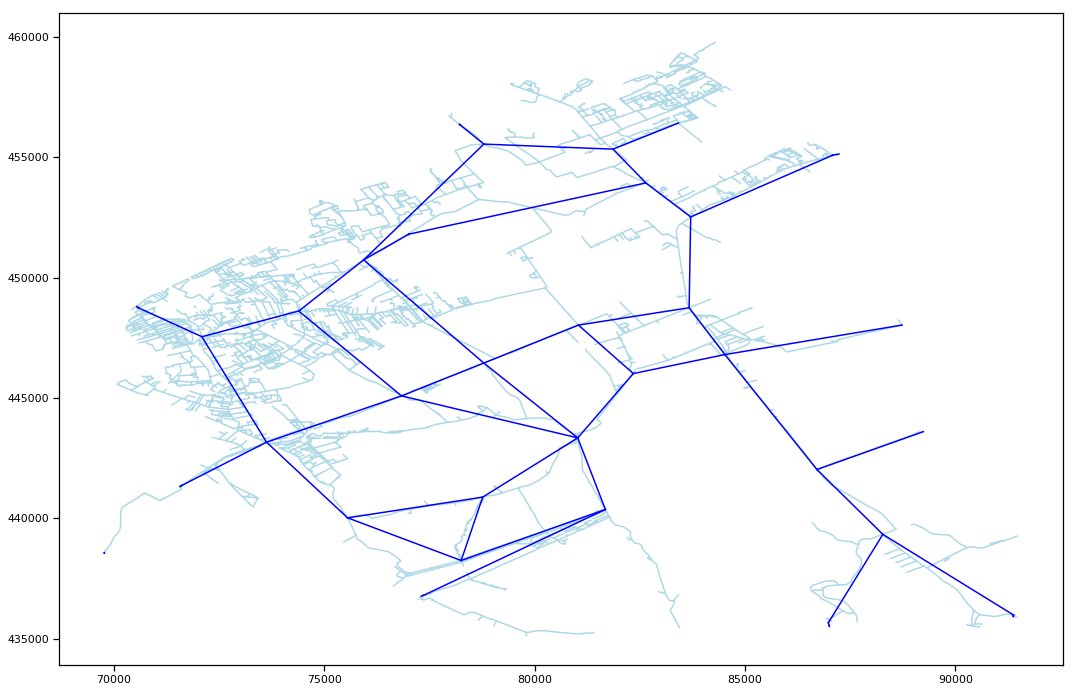

In [3]:
fig,ax = plt.subplots(1,figsize = (18,12))

for shp in boezem.shapes():
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'LightBlue')

for shp in RTCtakken.shapes():
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'Blue')    
plt.show()
    

In [4]:
treexy = ET.parse(xml_file)

names = []
x = []
y = []
for i in treexy.iter(xmlcode + 'node'):
    x.append(i.attrib['x'])
    y.append(i.attrib['y'])    
    names.append(i.attrib['id'])

dfxy = pd.DataFrame(index = names)
dfxy['x'] = x
dfxy['y'] = y
dfxy.head()
    
    


,x,y
N1,71538.62,441142.57
N4,70545.79,448791.50
N5,70590.09,448741.04
N7,71573.05,441316.86
N8,71606.43,441355.23


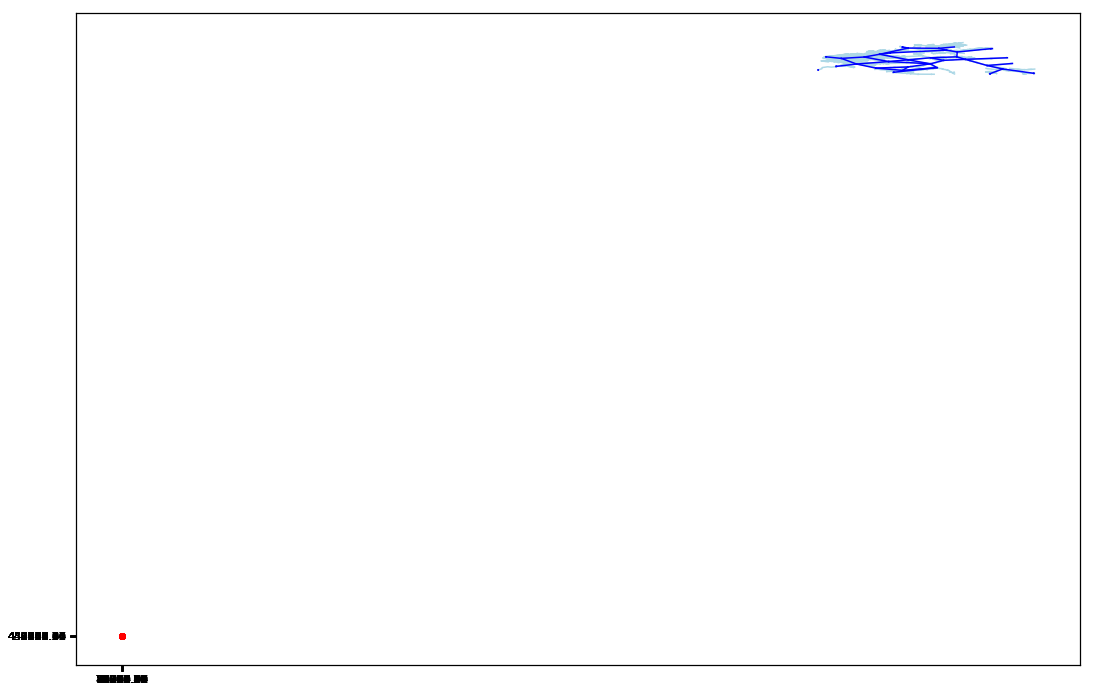

In [5]:
fig , ax = plt.subplots( 1, figsize = (18,12) )

for shp in boezem.shapes(): #voor snellere resultaten, comment deze shapefile weg. 
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'LightBlue')

for shp in RTCtakken.shapes():
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'Blue')    
    
ax.plot(dfxy.x, dfxy.y, 'o', color = 'r')  

plt.show()
                  

In [6]:
results = pd.read_csv(csv_file, sep = ';')

initial_wl = []
for name in dfxy.index.values:
    initial_wl.append(results["{}_HRTC".format(name)].iloc[-1]) #.iloc geeft de index location

dfxy['ini_wl'] = initial_wl

dfxy.head()
    
    


KeyError: 'N1_HRTC'

In [ ]:
fig,ax = plt.subplots(1,figsize = (18,12))

for shp in boezem.shapes():
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'LightBlue')

for shp in RTCtakken.shapes():
    x = np.array(shp.points)[:,0]
    y = np.array(shp.points)[:,1]
    ax.plot(x,y, color = 'Blue')    
    
ax.plot(dfxy.x, dfxy.y, 'o', color = 'r')  

for k in range(0,len(dfxy.index.values)):
    ax.annotate(dfxy.index[k] + "\n H: "+ "{0:.2f}".format(dfxy.ini_wl[k]), 
                            (dfxy.x[k], dfxy.y[k]), 
                            xycoords="data", xytext=(8, -4), textcoords='offset points', ha='left', va='top',  fontsize=11, backgroundcolor='white',alpha=.9)

plt.show()